# Proyek Analisis Data: Bike Sharing Dataset
- Nama: Karisa Zihni Lutfiana
- Email: zihnikarisa@gmail.com
- Id Dicoding: karis0220

## Menentukan Pertanyaan Bisnis

- pertanyaan 1:-kapan waktu terbaik banyak orang menyewa sepeda? 
- Pertanyaan 2: Bagaimana pengaruh cuaca terhadap penyewaan sepeda?

## Menyiapkan semua library yang dibuthkan

In [113]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [114]:
hour_df = pd.read_csv("./Bike-sharing-dataset/hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [115]:
day_df = pd.read_csv("./Bike-sharing-dataset/day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


### Assessing Data

#### Assessing Hour Data

In [116]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


The hour data has no missing value, but the column 'dteday' still have object type so we need to convert it to datetime type

In [117]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


The hour data abpve looks normal. The hour data above all looks already normalized. So, let's convert it back to original values

In [118]:
hour_df['season'].replace(1, 'springer', inplace=True)
hour_df['season'].replace(2, 'summer', inplace=True)
hour_df['season'].replace(3, 'fall', inplace=True)
hour_df['season'].replace(4, 'winter', inplace=True)
hour_df['season'].unique()

hour_df['weathersit'].replace(1, 'Clear', inplace=True)
hour_df['weathersit'].replace(2, 'Mist', inplace=True)
hour_df['weathersit'].replace(3, 'Light Snow', inplace=True)
hour_df['weathersit'].replace(4, 'Heavy Rain', inplace=True)
hour_df['weathersit'].unique()

array(['Clear', 'Mist', 'Light Snow', 'Heavy Rain'], dtype=object)

In [119]:
# rescale the value back to normal
hour_df['temp'] = hour_df['temp'] * 41
hour_df['atemp'] = hour_df['atemp'] * 50
hour_df['hum'] = hour_df['hum'] * 100
hour_df['windspeed'] = hour_df['windspeed'] * 67

In [120]:
hour_df.describe()

,instant,yr,mnth,hr,holiday,weekday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,20.376474,23.788755,62.722884,12.736540,35.676218,153.786869,189.463088
std,5017.0295,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,7.894801,8.592511,19.292983,8.196795,49.305030,151.357286,181.387599
min,1.0000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.820000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,13.940000,16.665000,48.000000,7.001500,4.000000,34.000000,40.000000
50%,8690.0000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,20.500000,24.240000,63.000000,12.998000,17.000000,115.000000,142.000000
75%,13034.5000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,27.060000,31.060000,78.000000,16.997900,48.000000,220.000000,281.000000
max,17379.0000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,41.000000,50.000000,100.000000,56.996900,367.000000,886.000000,977.000000


#### Assessing Day Data

In [121]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


The day data has no missing value, but the column 'dteday' still have object type so we need to convert it to datetime type

In [122]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


### Cleaning Data

In [123]:
# convert date to datetime type
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])

day_df['dteday'] = pd.to_datetime(hour_df['dteday'])

hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  object        
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  object        
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

## Exploratory Data Analysis (EDA)

### Explore rental bikes by time

In [124]:
hour_df.groupby(by=['workingday']).cnt.sum()

workingday
0    1000269
1    2292410
Name: cnt, dtype: int64

In [125]:
hour_df.groupby(by=['holiday']).cnt.sum()

holiday
0    3214244
1      78435
Name: cnt, dtype: int64

### Explore rental bikes by its season

In [126]:
hour_df.groupby(by=['season']).cnt.sum()

season
fall        1061129
springer     471348
summer       918589
winter       841613
Name: cnt, dtype: int64

### Explore rental bikes by month

In [127]:
hour_df.groupby(by=['mnth']).cnt.sum()

mnth
1     134933
2     151352
3     228920
4     269094
5     331686
6     346342
7     344948
8     351194
9     345991
10    322352
11    254831
12    211036
Name: cnt, dtype: int64

In [128]:
hour_df.groupby(by=["weekday", 'season']).agg({
    "holiday": "sum",
    "workingday": "sum",
    "casual": "sum",
    "registered": "sum",
    "cnt": "sum"
})

holiday  workingday  casual  registered     cnt
weekday season                                                   
0       fall            0           0   47053       91378  138431
        springer        0           0   14450       45745   60195
        summer          0           0   48372       81278  129650
        winter          0           0   30646       85105  115751
1       fall           72         551   27444      118863  146307
        springer      141         471    6572       57199   63771
        summer         72         572   22802      100453  123255
        winter         72         528   13966      108204  122170
2       fall            0         647   23371      129344  152715
        springer       23         548    5868       63945   69813
        summer          0         624   17418      108031  125449
        winter          0         611   11186      109946  121132
3       fall           24         624   24672      133382  158054
        springer        0         582    5020       60257   65277
        summer          0         646   17391      113156  130547
        winter          0         599   10236      108934  119170
4       fall            0         671   23973      135588  159561
        springer        0         578    5554       66801   72355
        summer          0         624   20158      115049  135207
        winter         48         550   11775      106497  118272
5       fall            0         648   28114      127153  155267
        springer        0         615    7353       66911   74264
        summer         24         600   26006      109786  135792
        winter         24         576   16765      105702  122467
6       fall            0           0   51464       99330  150794
        springer        0           0   15805       49868   65673
        summer          0           0   51375       87314  138689
        winter          0           0   35208       87443  122651

### Explore rental bikes by hour
Here we clustering hour into its time group morning, night, etc so the hour values become more meaningful. Below the grouping order:

- Morning 5 am to 12 pm (noon)- 
Afternoon 12 pm to 5 pm
- 
Evening 5 pm to 9 
- .
Night 9 pm to 4 am.

In [129]:
hour_df['hour_time'] = hour_df.hr.apply(lambda x: "Morning" if (x>= 5 and x <= 12) else ("Afternoon" if x < 17 else ("Evening" if x <= 21 else "Night" )))

In [130]:
hour_df.groupby(by='hour_time').cnt.sum()

hour_time
Afternoon     863716
Evening      1163416
Morning      1105994
Night         159553
Name: cnt, dtype: int64

### Explore rental bikes by weather

In [131]:
hour_df.groupby(by='weathersit').cnt.sum().sort_values(ascending=False)

weathersit
Clear         2338173
Mist           795952
Light Snow     158331
Heavy Rain        223
Name: cnt, dtype: int64

In [132]:
min_temp_df = hour_df[hour_df['temp'] == hour_df['temp'].min()]
print(f'Min temp has {min_temp_df.cnt.sum()} rentals')

max_temp_df = hour_df[hour_df['temp'] == hour_df['temp'].max()]
print(f'Max temp has {max_temp_df.cnt.sum()} rentals')

Min temp has 712 rentals
Max temp has 294 rentals


In [133]:
min_atemp_df = hour_df[hour_df['atemp'] == hour_df['atemp'].min()]
print(f'Min atemp has {min_atemp_df.cnt.sum()} rentals')

max_atemp_df = hour_df[hour_df['atemp'] == hour_df['atemp'].max()]
print(f'Max atemp has {max_atemp_df.cnt.sum()} rentals')

Min atemp has 39 rentals
Max atemp has 101 rentals


In [134]:
hour_df.groupby(by=["mnth"]).agg({
    "holiday": "sum",
    "workingday": "sum",
    "casual": "sum",
    "registered": "sum",
    "cnt": "sum"
})

,holiday,workingday,casual,registered,cnt
mnth,,,,,
1,71,907,12042,122891,134933
2,47,913,14963,136389,151352
3,0,1069,44444,184476,228920
4,48,957,60802,208292,269094
5,48,1032,75285,256401,331686
6,0,1032,73906,272436,346342
7,48,984,78157,266791,344948
8,0,1104,72039,279155,351194
9,48,957,70323,275668,345991


## Visualization & Explanatory Analysis

### Pertanyaan 1: kapan waktu terbaik banyak orang menyewa sepeda?

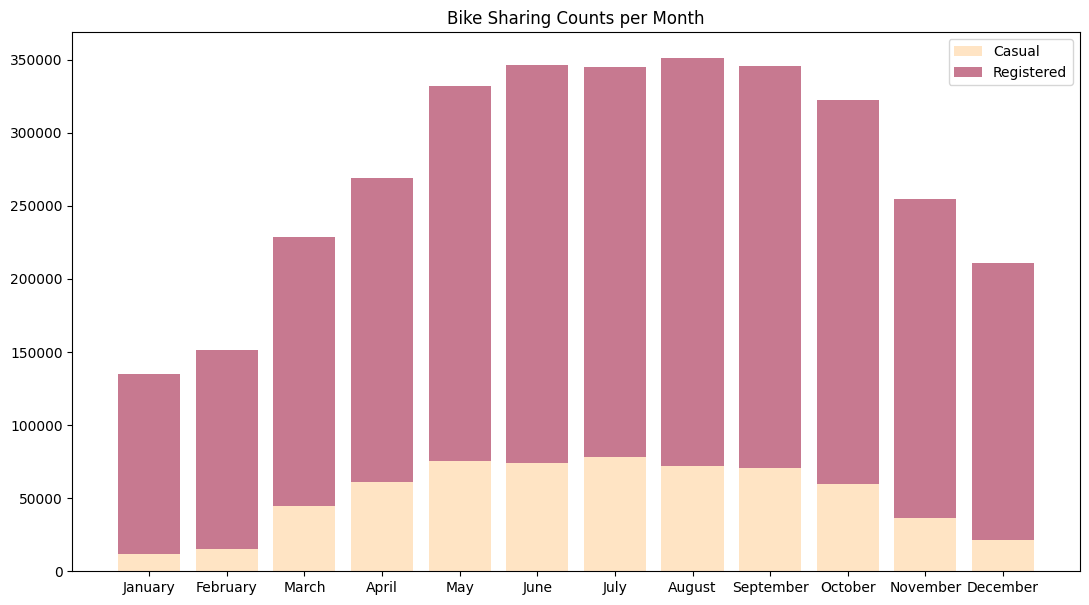

In [171]:
bymonth_df = hour_df.groupby(by=['mnth']).agg({
    'casual': 'sum',
    'registered': 'sum',
    'cnt': 'sum'
})
months= ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
# plt.bar(x=months, height=month_rental_df['cnt'])
y1 = bymonth_df['casual']
y2 = bymonth_df['registered']
plt.figure(figsize=(13,7))
plt.bar(months, y1, color='#ffe4c4')
plt.bar(months, y2, bottom=y1, color='#c77990')
plt.legend(['Casual', 'Registered'])

plt.title('Bike Sharing Counts per Month')
plt.show()

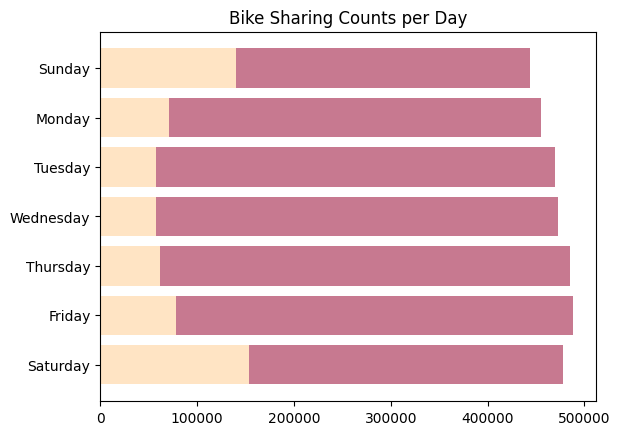

In [170]:
byday_df = hour_df.groupby(by=['weekday']).agg({
    'casual': 'sum',
    'registered': 'sum',
    'cnt': 'sum'
})
days= ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
y1 = byday_df['casual']
y2 = byday_df['registered']
plt.barh(y=days, width=y1, color='#ffe4c4')
plt.barh(y=days, width=y2, left=y1, color='#c77990')
plt.gca().invert_yaxis()
plt.title('Bike Sharing Counts per Day')
plt.show()

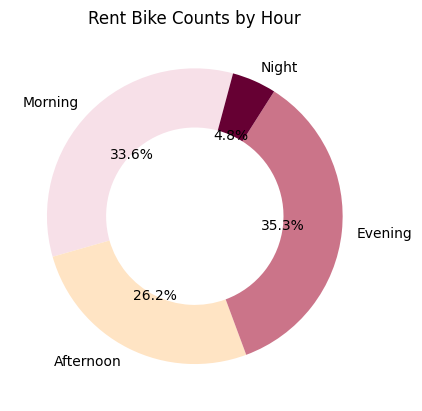

In [68]:
hour_time = hour_df.groupby(by='hour_time').cnt.sum()
hour_time = hour_time.reindex(index= ['Morning', 'Afternoon', 'Evening', 'Night'])
plt.pie(
    x=hour_time,
    labels=hour_time.index,
    colors=colors,
    autopct='%1.1f%%',
    startangle=75,
    wedgeprops = {'width': 0.4}
)

plt.title("Rent Bike Counts by Hour")
plt.show()

In [31]:
isworkingday = hour_df.groupby(by=['workingday']).cnt.sum()
isholiday = hour_df.groupby(by=['holiday']).cnt.sum()
print(isholiday)

holiday
0    3214244
1      78435
Name: cnt, dtype: int64


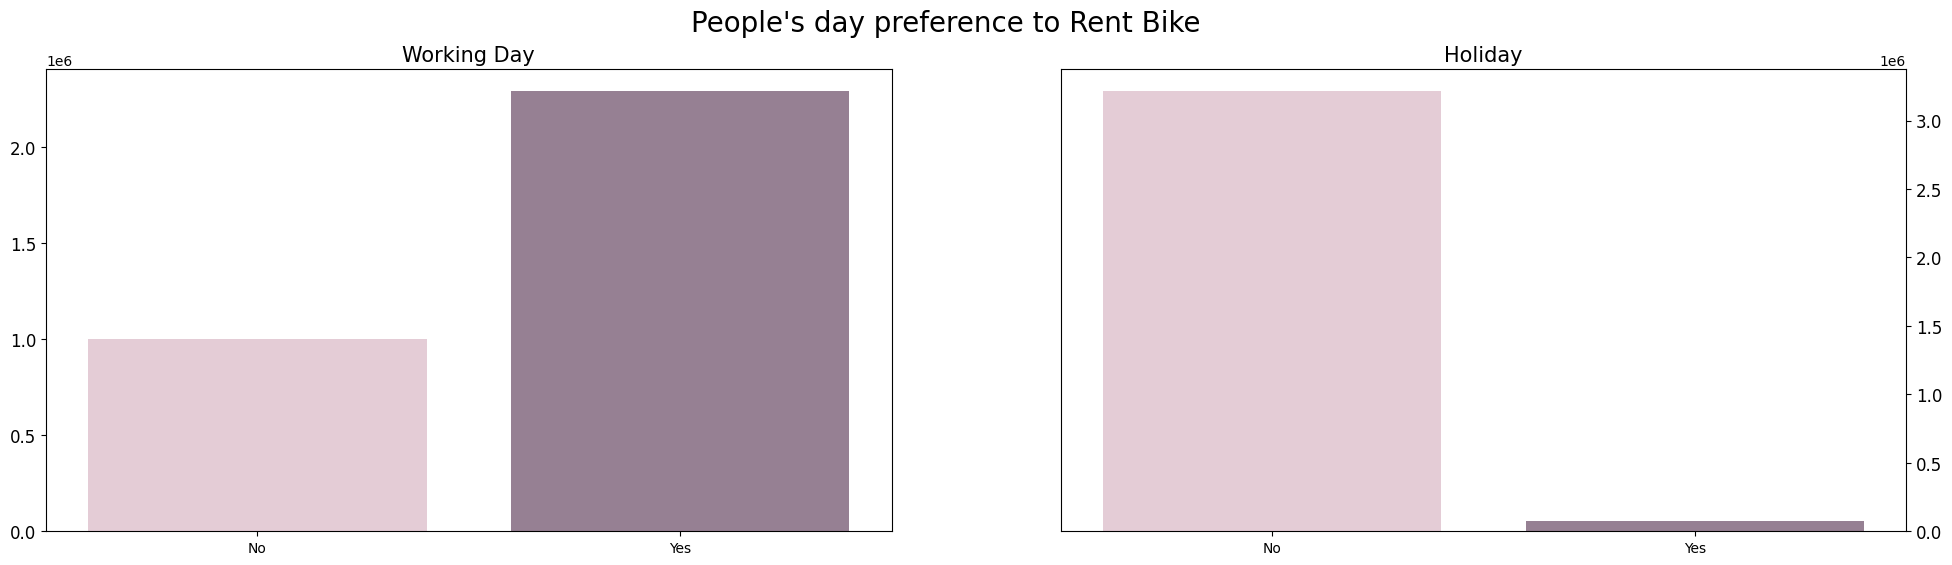

In [32]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))
 
colors = ["#e8c8d5", "#997d96"]
labels = ['No', 'Yes']
 
sns.barplot(x=labels, y=isworkingday, ax=ax[0], palette=colors, hue=labels)
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("Working Day", loc="center", fontsize=15)
ax[0].tick_params(axis ='y', labelsize=12)
 
sns.barplot(x=labels, y=isholiday, ax=ax[1], palette=colors, hue=labels)
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].set_title("Holiday", loc="center", fontsize=15)
ax[1].tick_params(axis='y', labelsize=12)
 
plt.suptitle("People's day preference to Rent Bike", fontsize=20)
plt.show()

### Pertanyaan 2: Bagaimana pengaruh cuaca terhadap penyewaan sepeda?

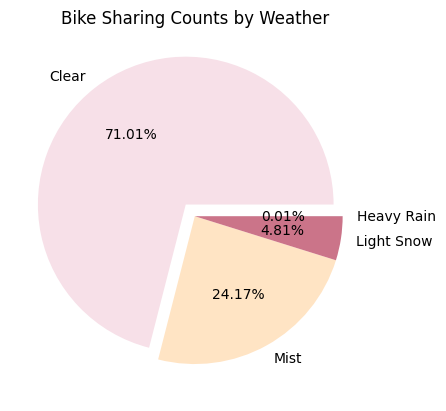

In [144]:
byweather = hour_df.groupby(by='weathersit').cnt.sum().sort_values(ascending=False)
byweather.index
colors = ('#f7e0e8', '#ffe4c4', '#cb7489', '#660033')
explode = (0.1, 0, 0, 0)

plt.pie(
    x=byweather,
    labels=byweather.index,
    autopct='%1.2f%%',
    colors=colors,
    explode=explode
)

plt.title("Bike Sharing Counts by Weather")
plt.show()

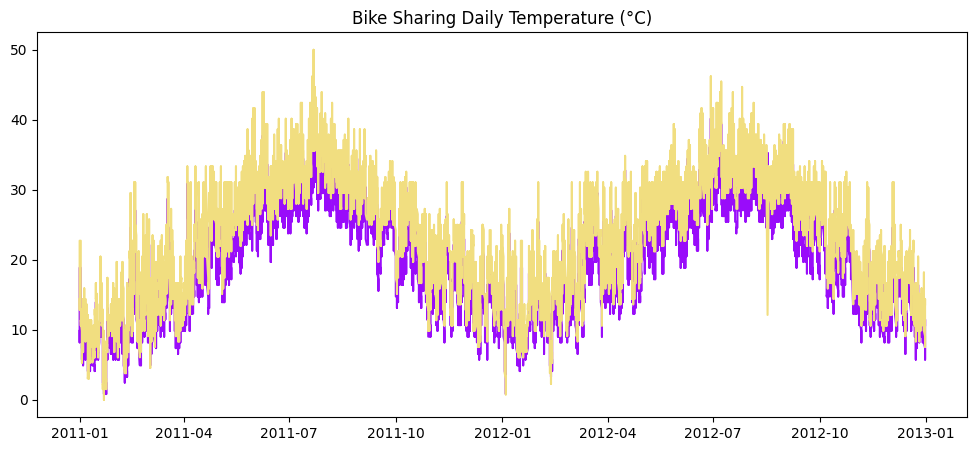

In [145]:
degree_sign = u'\N{DEGREE SIGN}'

plt.figure(figsize=(12, 5))
plt.plot(hour_df['dteday'], hour_df['temp'], color='#990cfa')
plt.plot(hour_df['dteday'], hour_df['atemp'], color='#f1de80')

plt.title(f'Bike Sharing Daily Temperature ({degree_sign}C)')
plt.show()

## Conclusion

### Pertanyaan 1: kapan waktu terbaik banyak orang menyewa sepeda?

Orang paling banyak menyewa sepeda saat
- pada pertengahan tahun yaitu sekitar pada bulan Juni, Juli, Agustus, September
- orang-orang cenderung memilih weekday daripada saat liburan seperti hari Kamis dan Jumat
- waktu yang paling sering digunakan untuk bersepeda adalah pagi hari dan sore hari

### Pertanyaan 2: Bagaimana pengaruh cuaca terhadap penyewaan sepeda?

- cuaca yang paling sering dipilih untuk bersepeda adalah sangat langit terang dan cerah (clear)
- pada pertengahan tahun, banyak orang bersepeda karena pada bulan-bulan tersebut memiliki temperatur cukup tinggi sehingga aman untuk bersepeda

In [172]:
hour_df.to_csv('eda_bike_dataset.csv')